In [141]:
from IPython.display import Latex
# Latex(r"""\begin{eqnarray} \large 
# Z_{n+1} = Z_{n}^{(2 * Z_{n})^{(p_{1})^{x} } }
# \end{eqnarray}""")

# El Gato (catty data).
    
    Z^(2 * Z^( -c(1)^( Z^-c(2) )^( Z^-c(3) )^( Z^-c(4) )^( Z^-c(5) )^( Z^-c(6) )^( Z^-c(7))))
    
    Example parameter set:
    c = [0.083821, -0.2362, 0.46518, -0.91572, 1.6049, -2.3531, 3.2664]

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

p = [0.083821, -0.2362, 0.46518, -0.91572, 1.6049, -2.3531, 3.2664]

In [3]:
def ElGato(Z, p, Z0=None, ET=None):
    """ Z = bugga_bear(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
        p[0]
    
    MATLAB:
    Z^(2 * Z^( -c(1)^( Z^-c(2) )^( Z^-c(3) )^( Z^-c(4) )^( Z^-c(5) )^( Z^-c(6) )^( Z^-c(7))))
    """
    Zout = Z**(2 * Z**( -((((((p[0]**Z**-p[1])**(Z**-p[2]))**(Z**-p[3]))**(Z**-p[4]))**(Z**-p[5]))**(Z**-p[6]))))
    return Zout

In [66]:
#                                        -- define parameters p iterate the above equation
par_set = {'n_rows': 800, 'n_cols': 800}
par_set['center_point'] = -1.3 + 0.0*1j
par_set['theta'] = -np.pi / 2
par_set['zoom'] = 1/4

par_set['it_max'] = 96
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [0.083821, -0.2362, 0.46518, -0.91572, 1.6049, -2.3531, 3.2664]

list_tuple = [(ElGato, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

79.35234212875366 	 total time
converstion time =	 1.288599967956543


coloring time:	 7.063806056976318


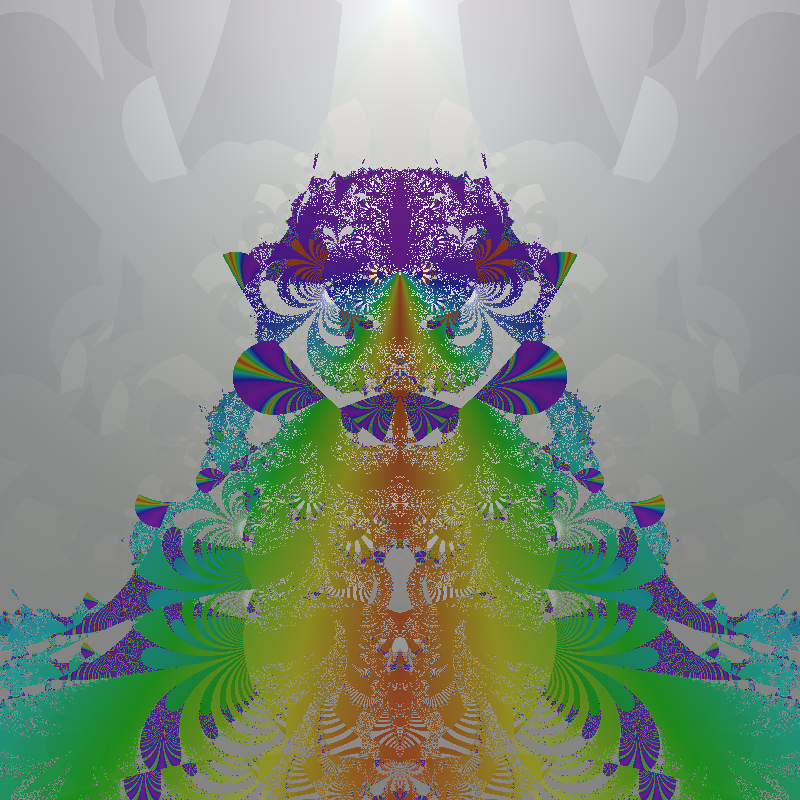

In [139]:
H = ncp.range_norm(Zr, lo=0.05, hi=0.78)
S = ncp.range_norm(1 - ETn, lo=0.02, hi=0.8)
V = ncp.range_norm(np.sqrt(Zd * ETn) - ETn, lo=0.5, hi=1.0)

t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 7.2845940589904785


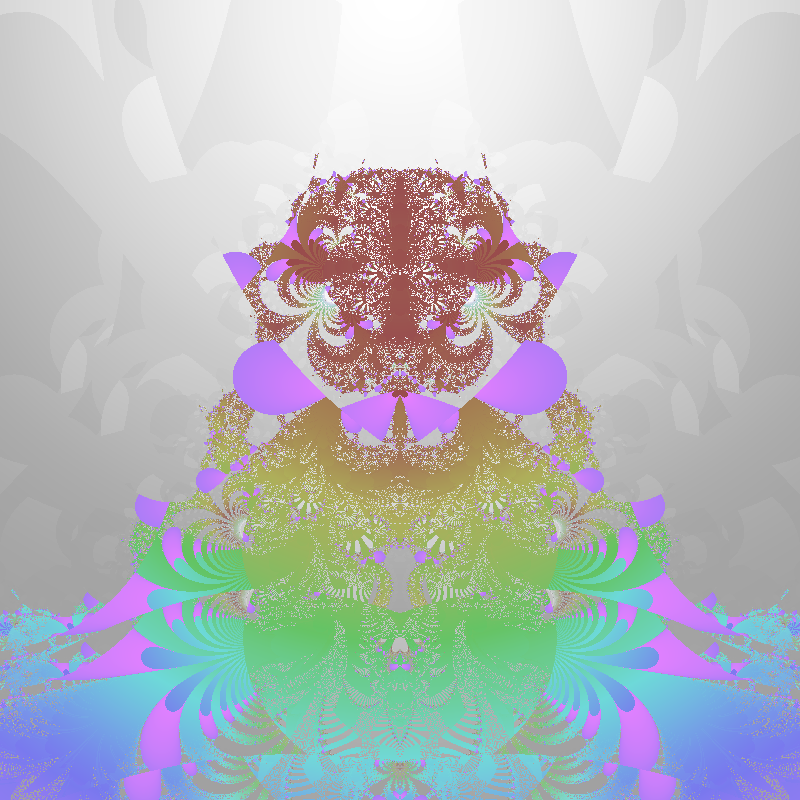

In [140]:
H = ncp.range_norm(Zd - ETn, lo=0.0, hi=0.8)
S = ncp.range_norm(1 - ETn, lo=0.0, hi=0.5)
V = ncp.range_norm(Zd - ETn, lo=0.6, hi=1.0)

t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

2.532444953918457 	 total time
converstion time =	 0.08315300941467285
coloring time =	 0.2726931571960449


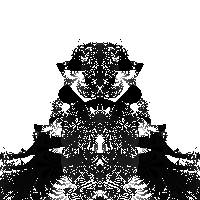

In [70]:
#                                        smaller -> view individual escape time sets -- "iconic" 
par_set = {'n_rows': 200, 'n_cols': 200}
par_set['center_point'] = -1.3 + 0.0*1j
par_set['theta'] = -np.pi / 2
par_set['zoom'] = 1/4

par_set['it_max'] = 40
par_set['max_d'] = 10 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [0.083821, -0.2362, 0.46518, -0.91572, 1.6049, -2.3531, 3.2664]

list_tuple = [(ElGato, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print('converstion time =\t', time.time() - t0)

t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 0.23125004768371582


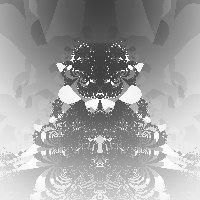

In [73]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 0.2286989688873291


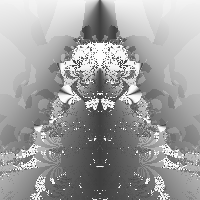

In [74]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 0.42075490951538086


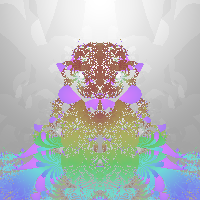

In [75]:
H = ncp.range_norm(Zd_sm - ETn_sm, lo=0.0, hi=0.8)
S = ncp.range_norm(1 - ETn_sm, lo=0.0, hi=0.5)
V = ncp.range_norm(Zd_sm - ETn_sm, lo=0.6, hi=1.0)

t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

ET =	 2


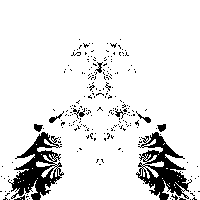

ET =	 3


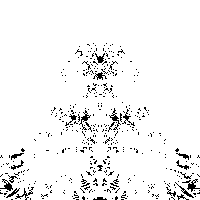

ET =	 4


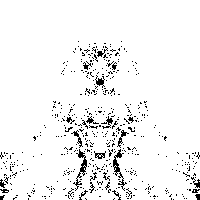

ET =	 5


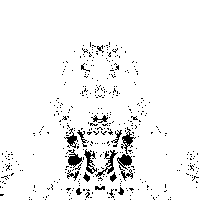

ET =	 6


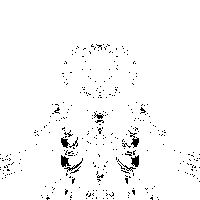

ET =	 7


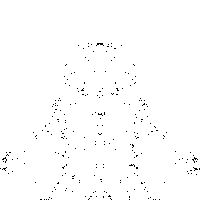

ET >	 8


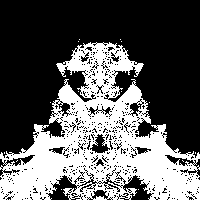

In [76]:
#                                        view smaller - individual escape time starting points
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [77]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 2443
2 4212
3 2045
4 2136
5 2106
6 1112
7 379
8 207
9 123
10 99
11 79
12 73
13 46
14 42
15 34
16 32
17 39
18 31
19 31
20 26
21 25
22 26
23 12
24 24
25 18
26 23
27 29
28 9
29 18
30 6
31 21
32 14
33 8
34 15
35 4
36 7
37 6
38 6
39 8
40 2

How many never escaped:
> 24424


In [78]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  4.83 56.0 degrees

    24424 total unescaped points

   points near V       (plane units)
    24424 within V/ 1  (4.826)
    24038 within V/ 2  (2.413)
    14895 within V/ 3  (1.609)
    10124 within V/ 4  (1.206)
     7167 within V/ 5  (0.965)
     5153 within V/ 6  (0.804)
     3787 within V/ 7  (0.689)
     2917 within V/ 8  (0.603)
     2306 within V/ 9  (0.536)
     1875 within V/10  (0.483)
     1545 within V/11  (0.439)
